In [1]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1755730136202.jpg,0.743957,0.721565,0.268171,0.068642,0.807886
1,Dataset/1755881699712.jpg,0.735492,0.393991,0.025340,0.704641,0.775125
2,Dataset/1755881699455.jpg,0.647486,0.347244,0.032026,0.764829,0.743753
3,Dataset/1755898111959.jpg,0.643529,0.194073,0.932960,0.816683,0.686596
4,Dataset/1757521103279.jpg,0.466799,0.372699,0.790359,0.955269,0.666392
...,...,...,...,...,...,...
5021,Dataset/1755730926600.jpg,0.431105,0.116808,0.432124,0.122402,0.005686
5022,Dataset/1755730235280.jpg,0.422223,0.162840,0.426236,0.166678,0.005553
5023,Dataset/1757528198850.jpg,0.671712,0.599244,0.668800,0.603100,0.004832
5024,Dataset/1755777806122.jpg,0.124657,0.827649,0.127528,0.826379,0.003139


In [2]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return img_path

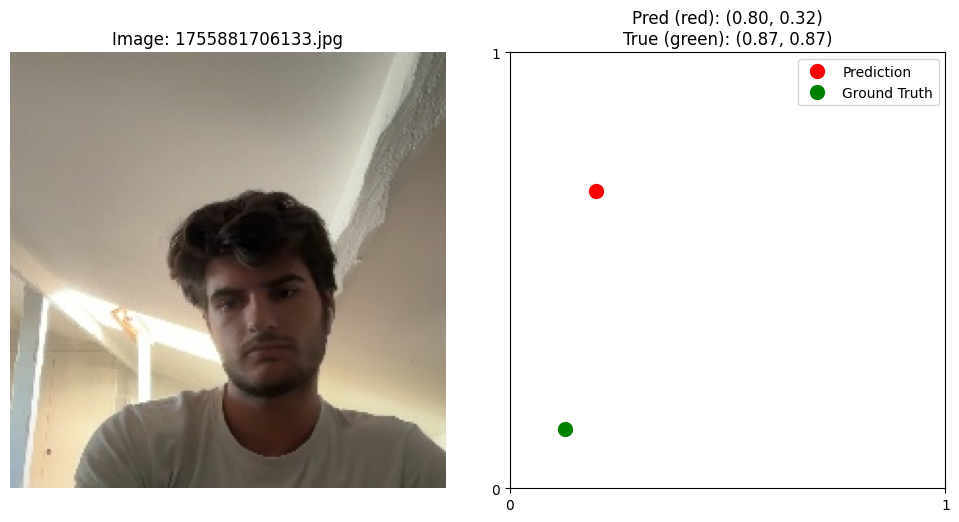

In [3]:
images_to_delete = []

idx = 0
while True:
    img_path = display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(img_path)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [4]:
print('images_to_delete', images_to_delete)

images_to_delete []


In [5]:
dataset_df = pd.read_csv('dataset.csv')
print('Length of dataset_df', len(dataset_df))

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
filtered_dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

filtered_dataset_df.to_csv('dataset_fixed.csv', index=False)
print('Length of filtered_dataset_df', len(filtered_dataset_df))


Length of dataset_df 5008
Length of filtered_dataset_df 5008
